# Density-based spatial clustering of applications with noise - DBSCAN

1. Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.

2. For each core point if it is not already assigned to a cluster, create a new cluster.

3. Find recursively all its density connected points and assign them to the same cluster as the core point.

    A point a and b are said to be density connected if there exist a point c which has a sufficient number of points in its neighbors and both the points a and b are within the eps distance. This is a chaining process. So, if b is neighbor of c, c is neighbor of d, d is neighbor of e, which in turn is neighbor of a implies that b is neighbor of a.

4. Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.

![title](dbscan_figure.png)

# Directly Density Reachable
Data-point a is directly density reachable from a point b if 
1. |N (b)|≥ MinPts; i.e. b is a core point.
2. a ∈ N(b) i.e. a is in the epsilon neighborhood of b.

# Density Connected
A point a is density connected to a point b with respect to ϵ and MinPts, if there is a point c such that, both a and b are density reachable from c w.r.t. to ϵ and MinPts.

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import DBSCAN 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 

In [9]:
X = np.loadtxt('dataset0.txt')

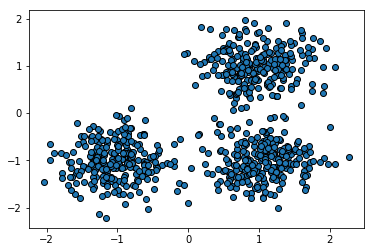

In [10]:
plt.plot(X[:, 0], X[:, 1], 'o', markeredgecolor='k', markersize=6)

In [11]:
# Load data in X 
db = DBSCAN(eps=0.3, min_samples=10).fit(X) 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 

In [12]:
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)  

In [13]:
# Black removed and is used for noise instead. 
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r'] 

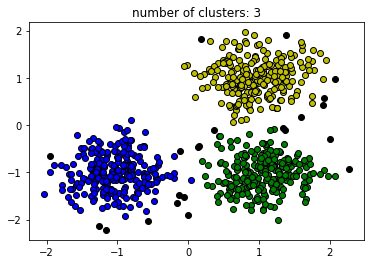

In [14]:
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = X[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 